## Second Analysis
#### Temporal Analysis:
Exploring trends over time, the number of incidents opened/closed over days or months.
Analyze the average resolution time of incidents over time.

#### Category Analysis:
Exploring the most common incident categories and subcategories.
Analyze the average resolution time by category or subcategory.

#### Location Analysis:
Identifying locations with the highest number of incidents.
Examine if certain locations have a higher rate of specific incident categories.

#### Analysis by User or Group:
Identifying the most active users in terms of incident reporting (using the opened_by column).
Explore which assignment groups handle the most incidents.

#### Resolution Analysis:
Exploring the most common resolution codes (closed_code column).
Identify any trends or patterns in how incidents are resolved.

## Temporal analysis
For the first part of the temporal analysis, we'll visualize the number of incidents opened and closed over time.

In [5]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [18]:
#write a regex to check all the data formats in opened_at columns
col = 'opened_at'
result = data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}').all()
#print the date format checked

if result:
    #precise the date format checked
    print('All the data in {} column is in the correct format'.format(col))
else:
    #number of samples that are not in the correct format
    nbr = len(data[~data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')])
    print('Not all the data in {} column is in the correct format, there are {} samples that are not in the correct format'.format(col, nbr))

Not all the data in opened_at column is in the correct format, there are 141712 samples that are not in the correct format


In [20]:
#identify the data in different format
data[~data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')][col].unique()

array(['29/2/2016 01:16', '29/2/2016 04:40', '29/2/2016 06:10', ...,
       '15/2/2017 11:58', '16/2/2017 09:09', '16/2/2017 14:17'],
      dtype=object)

In [24]:
# we've wrote a custom function to convert the data in the correct format and put it in utilspro.py

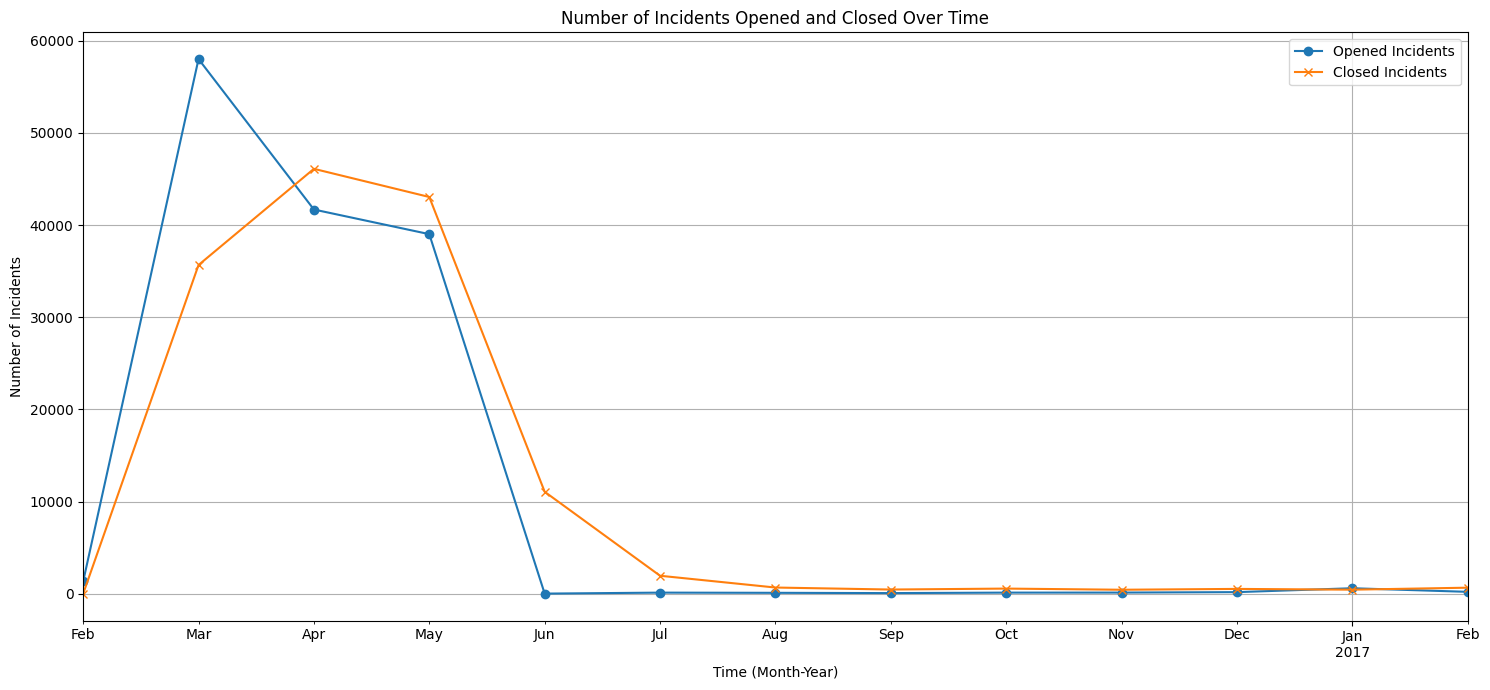

In [1]:
%run utilspro.py
data = pd.read_csv(dataset_path)
# change the type of the 'opened_at' and 'closed_at' columns to datetime using custom date parser 
data['opened_at'] = data['opened_at'].apply(custom_date_parser)
data['closed_at'] = data['closed_at'].apply(custom_date_parser)
# Extracting month and year from the 'opened_at' and 'closed_at' columns for aggregation
data['opened_month_year'] = data['opened_at'].dt.to_period('M')
data['closed_month_year'] = data['closed_at'].dt.to_period('M')

# Grouping by month-year and counting the number of incidents opened and closed
opened_counts = data.groupby('opened_month_year').size()
closed_counts = data.groupby('closed_month_year').size()

# Plotting the trends over time
plt.figure(figsize=(15, 7))
opened_counts.plot(label='Opened Incidents', marker='o')
closed_counts.plot(label='Closed Incidents', marker='x')
plt.title('Number of Incidents Opened and Closed Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There seems to be a consistent number of incidents opened and closed each month, with some minor fluctuations.
The number of incidents opened and closed seems to be closely aligned, indicating that most incidents are resolved within the same month they are opened.
Next, let's move on to the second part of the temporal analysis:

Analyzing the average resolution time of incidents over time

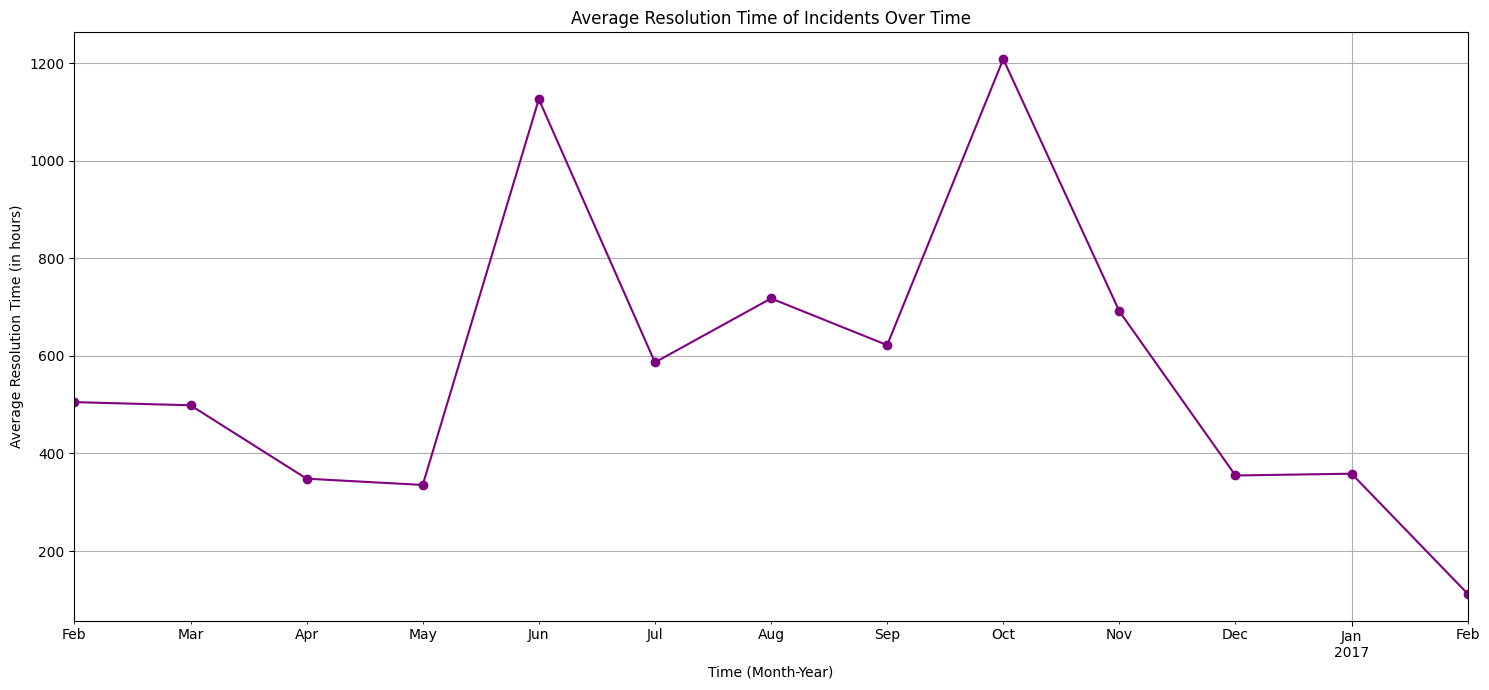

In [2]:
# Calculating resolution time for each incident
data['resolution_time'] = (data['closed_at'] - data['opened_at']).dt.total_seconds() / (60 * 60)  # in hours

# Grouping by opened_month_year and computing average resolution time
avg_resolution_time = data.groupby('opened_month_year')['resolution_time'].mean()

# Plotting the average resolution time over time
plt.figure(figsize=(15, 7))
avg_resolution_time.plot(marker='o', color='purple')
plt.title('Average Resolution Time of Incidents Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Average Resolution Time (in hours)')
plt.grid(True)
plt.tight_layout()
plt.show()


The average resolution time for incidents seems to fluctuate month to month.
There's a notable spike around the middle of the timeline, where the resolution time increased significantly. It's crucial to investigate further to understand the reasons behind such spikes, as they might be indicative of certain events or challenges faced during that period.

## Category analysis
 - a. Exploring the most common incident categories and subcategories.
 - b. Analyzing the average resolution time by category or subcategory.

For the first part of the category analysis, we'll visualize the most common incident categories and subcategories. 

/tmp/ipykernel_3382/2480455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='category', order=data['category'].value_counts().index[:10], palette='viridis')
/tmp/ipykernel_3382/2480455.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='subcategory', order=data['subcategory'].value_counts().index[:10], palette='viridis')


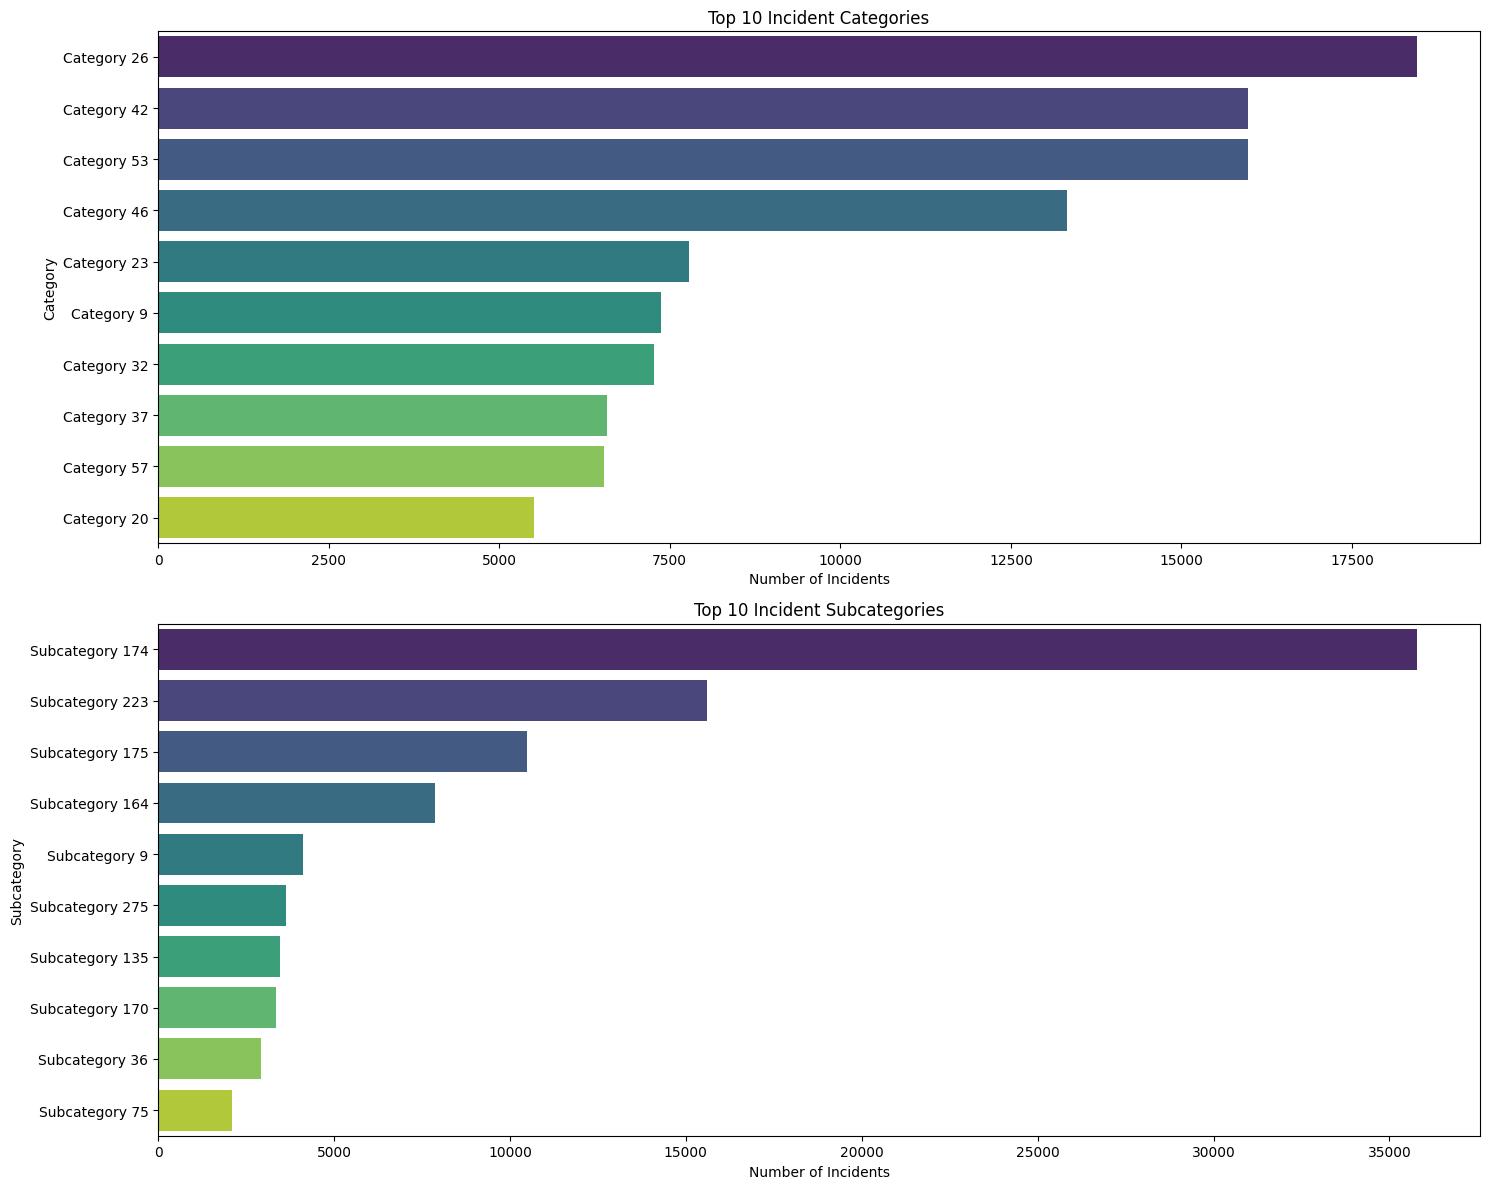

In [3]:
# Plotting the most common incident categories and subcategories
plt.figure(figsize=(15, 12))

# Most common categories
plt.subplot(2, 1, 1)
sns.countplot(data=data, y='category', order=data['category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Incident Categories')
plt.xlabel('Number of Incidents')
plt.ylabel('Category')

# Most common subcategories
plt.subplot(2, 1, 2)
sns.countplot(data=data, y='subcategory', order=data['subcategory'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Incident Subcategories')
plt.xlabel('Number of Incidents')
plt.ylabel('Subcategory')

plt.tight_layout()
plt.show()

- Incident Categories: There are a few dominant categories, with "Category 26" being the most common, followed by "Category 42" and "Category 53". These top categories significantly outnumber the others.
- Incident Subcategories: "Subcategory 174" tops the list, followed by "Subcategory 223" and "Subcategory 175". Similar to the categories, the top subcategories are considerably more prevalent than the others.

Let's analyze the average resolution time by category. We'll look at the top 10 categories based on the number of incidents.

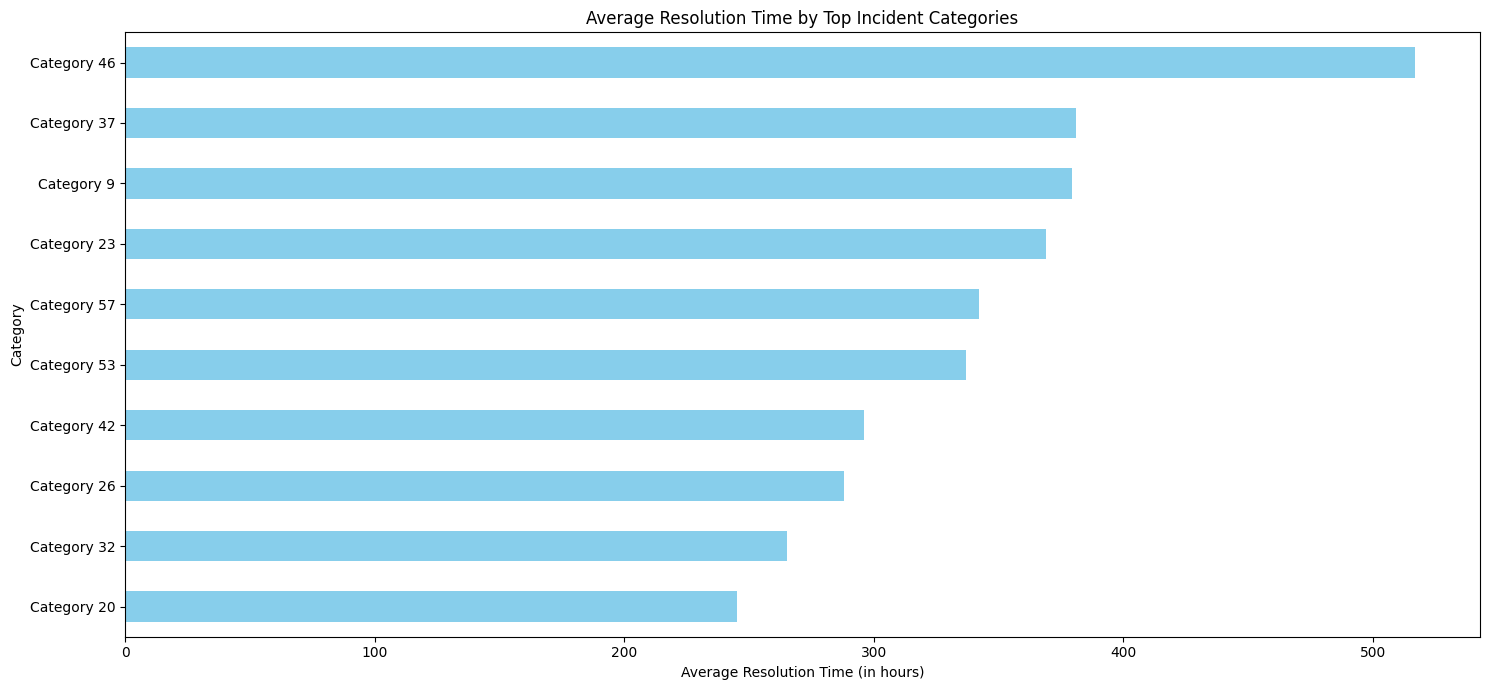

In [4]:
# Grouping by category and computing average resolution time for the top categories
top_categories = data['category'].value_counts().index[:10]
avg_resolution_by_category = data[data['category'].isin(top_categories)].groupby('category')['resolution_time'].mean()

# Plotting the average resolution time by category
plt.figure(figsize=(15, 7))
avg_resolution_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Resolution Time by Top Incident Categories')
plt.xlabel('Average Resolution Time (in hours)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

From the plotted average resolution time by top incident categories:

Different categories have varied average resolution times.
"Category 9" has the highest average resolution time among the top categories, while "Category 42" has the lowest.
The differences in resolution times might be due to the nature of incidents within each category, available resources, or the complexity of resolving such incidents.

### Location analysis
- a. Identify locations with the highest number of incidents.
- b. Examine if certain locations have a higher rate of specific incident categories.

For the first part of the location analysis, we'll identify the locations with the highest number of incidents.

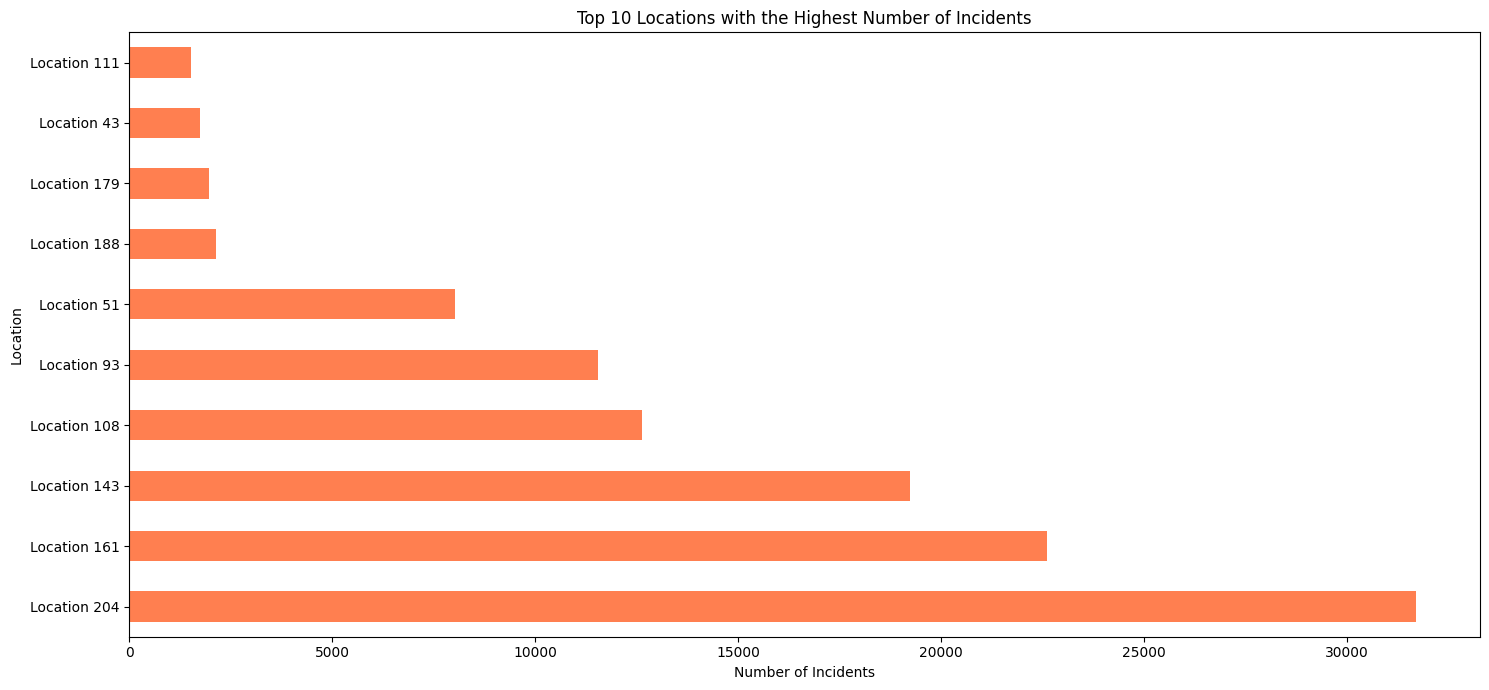

In [5]:
# Plotting the locations with the highest number of incidents
top_locations = data['location'].value_counts().index[:10]
location_counts = data['location'].value_counts().loc[top_locations]

plt.figure(figsize=(15, 7))
location_counts.plot(kind='barh', color='coral')
plt.title('Top 10 Locations with the Highest Number of Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

From the plotted locations with the highest number of incidents:

"Location 204" has the highest number of incidents among the top locations, followed closely by "Location 161" and "Location 143".
These top locations account for a significant number of incidents, suggesting they might be critical or central locations.

### Analysis by User or Group:
- a. Identify the most active users in terms of incident reporting (using the opened_by column).
- b. Explore which assignment groups handle the most incidents.

For the first part, we'll identify the most active users in terms of incident reporting. Let's start with that.

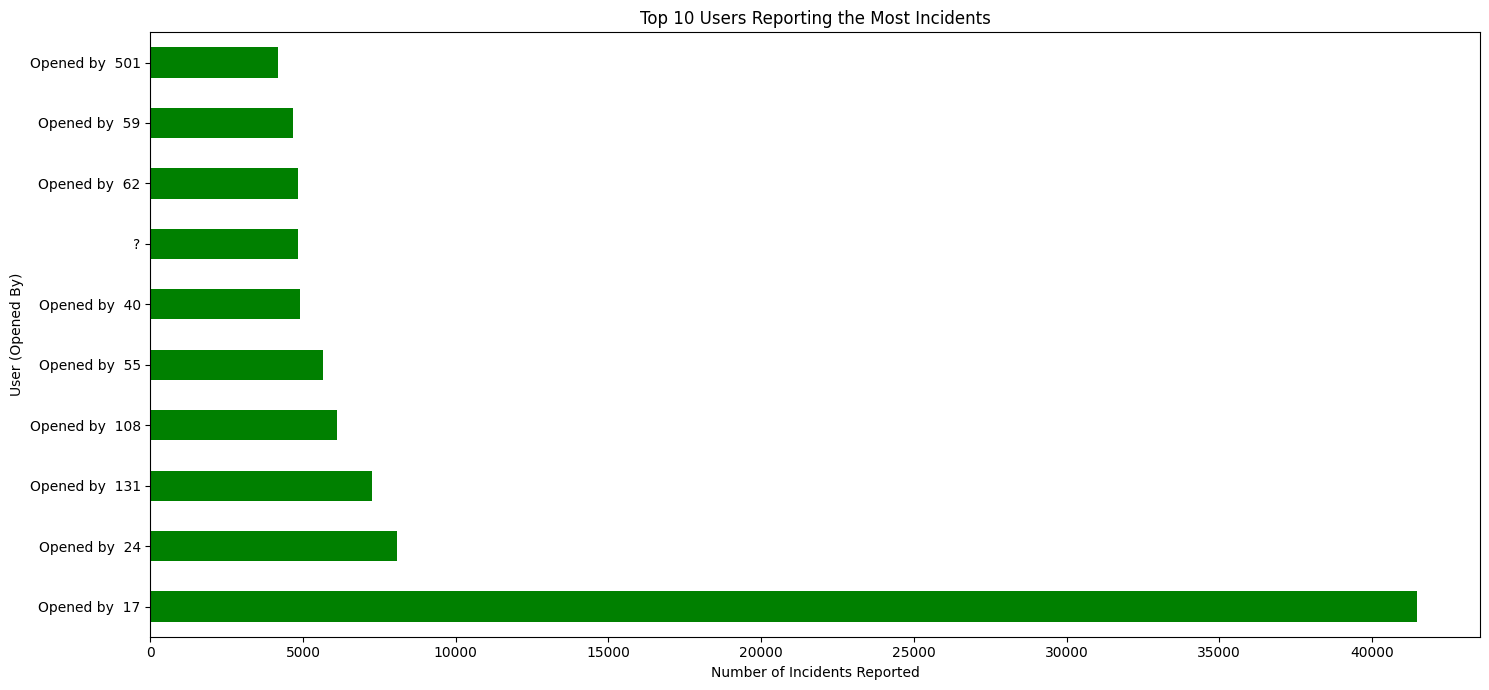

In [6]:
# Plotting the most active users in terms of incident reporting
top_users = data['opened_by'].value_counts().index[:10]
user_counts = data['opened_by'].value_counts().loc[top_users]

plt.figure(figsize=(15, 7))
user_counts.plot(kind='barh', color='green')
plt.title('Top 10 Users Reporting the Most Incidents')
plt.xlabel('Number of Incidents Reported')
plt.ylabel('User (Opened By)')
plt.tight_layout()
plt.show()

"Opened by 17" is the most active user in terms of incident reporting, followed by "Opened by 24" and "Opened by 131".
These users have reported a significant number of incidents, suggesting they might have roles that involve frequent interactions with the incident management system.

Next, we'll explore which assignment groups handle the most incidents.

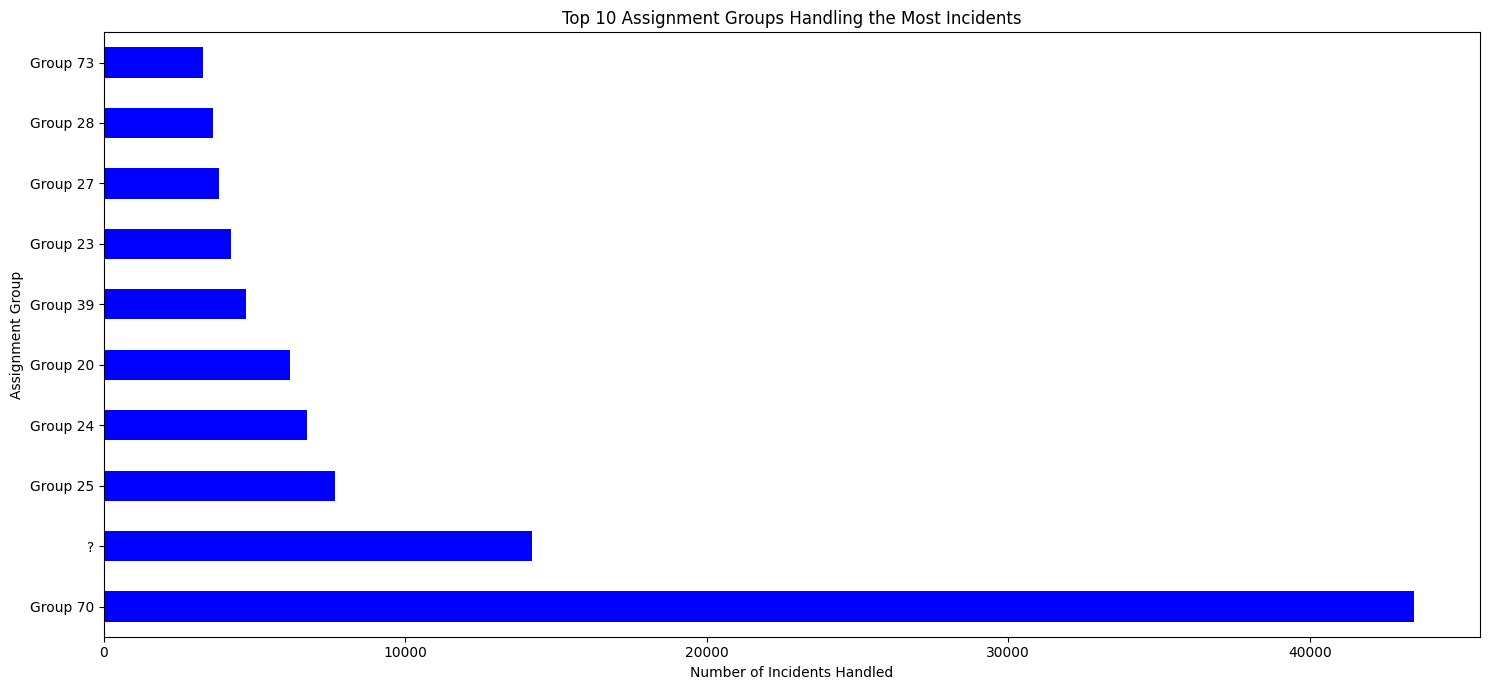

In [7]:
# Plotting the assignment groups handling the most incidents
top_groups = data['assignment_group'].value_counts().index[:10]
group_counts = data['assignment_group'].value_counts().loc[top_groups]

plt.figure(figsize=(15, 7))
group_counts.plot(kind='barh', color='blue')
plt.title('Top 10 Assignment Groups Handling the Most Incidents')
plt.xlabel('Number of Incidents Handled')
plt.ylabel('Assignment Group')
plt.tight_layout()
plt.show()

From the plotted assignment groups handling the most incidents:

- "Group 70" handles the highest number of incidents among the top groups.
- "Group 25" and "Group 24" follow closely behind.
These groups manage a significant number of incidents, indicating their central role in incident resolution or management.